## NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR>TUGAS KE - 5

## Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Menghitung total data yang pada kolomnya terdapat nilai null
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terlihat bahwa kolom **Age, Cabin and Embarked** memiliki nilai null. Kita akan perbaiki nanti jika akan digunakan

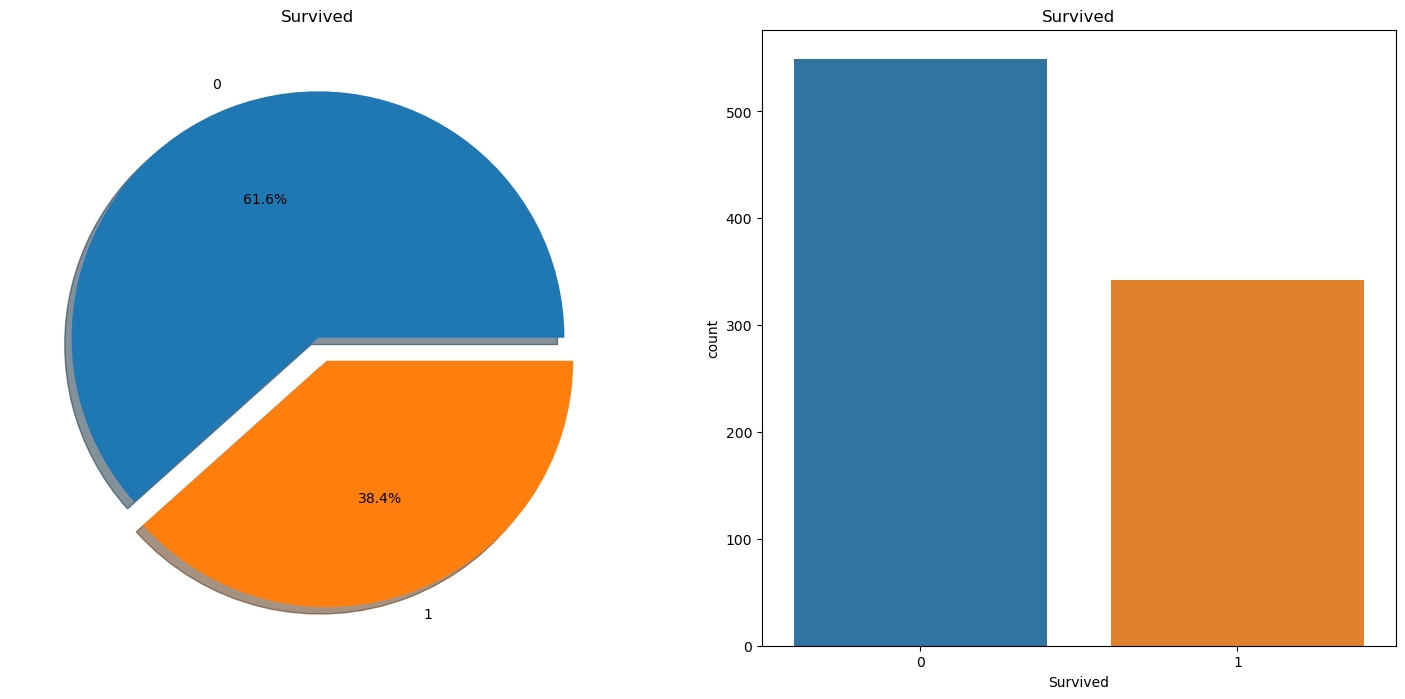

In [5]:
# Membuat dua subplot
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot pie chart pada subplot pertama
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Plot count plot pada subplot kedua
sns.countplot(x='Survived', data=data, ax=ax[1])  # Memperbaiki argumen di sini
ax[1].set_title('Survived')

# Menampilkan plot
plt.show()

Dari 891 penumpang pada dataset, hanya sekitar 350 yang survived atau **38.4%**.

Selanjutnya, kita bisa mengeksplorasi data lebih dalam lagi untuk melihat kategori apa saja yang survive dan tidak.

## Sex--> Categorical Feature

In [6]:
# Melihat total data jenis kelamin dan yang selamat
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

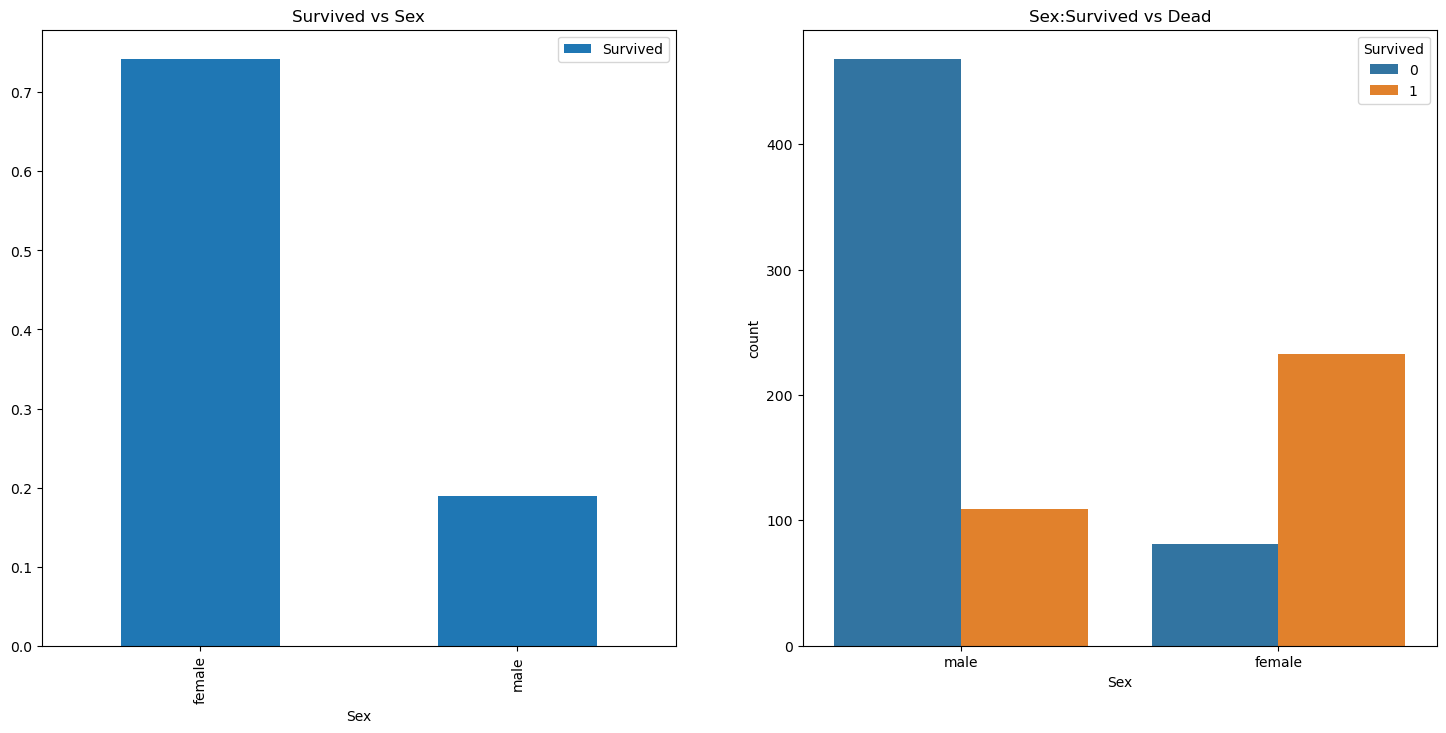

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Untuk fitur sex, kita bisa melihat bahwa perempuan lebih tinggi rate survivenya yaitu sekitar **75%** sedangkan lelaki hanya sekitar **18%**.

## Pclass --> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


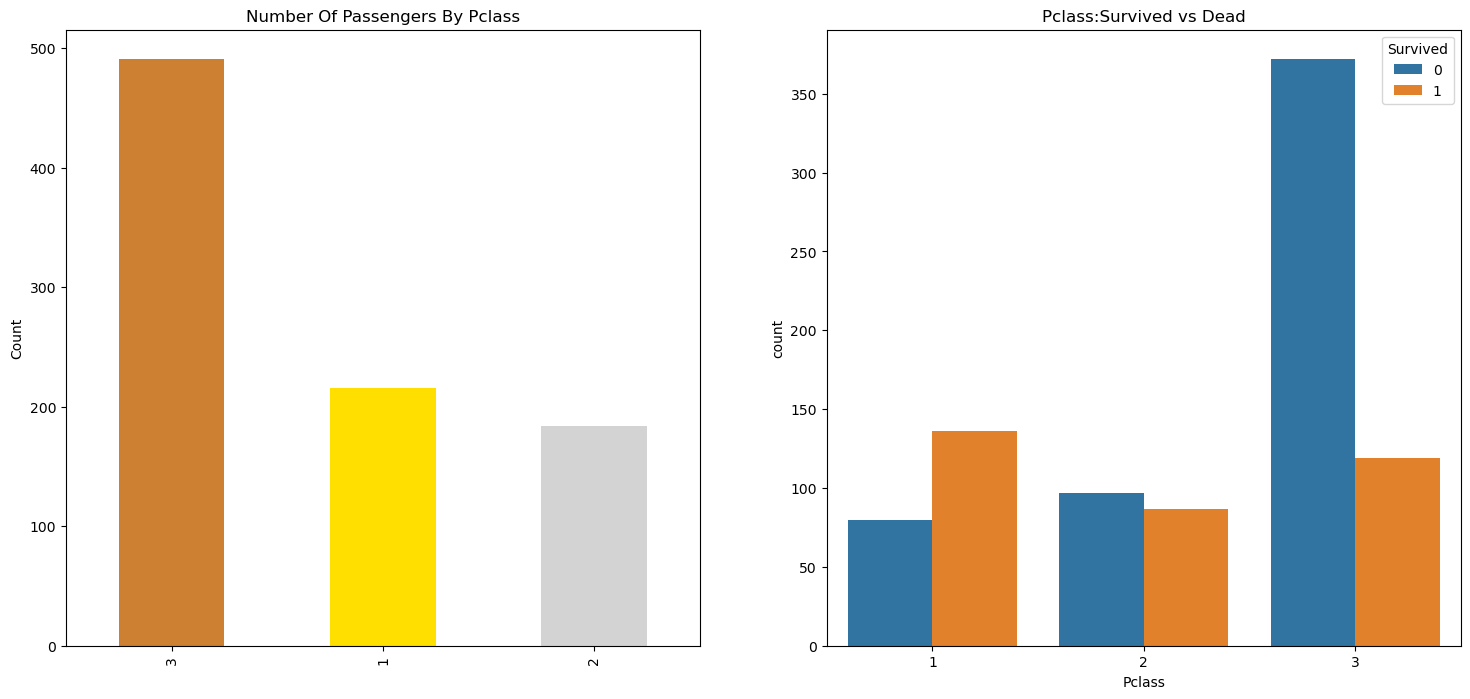

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Lalu, kita melihat fitur Pclass untuk melihat hubungan antara Pclass dengan survive rates. Terlihat bahwa penumpang kelas 1 dan 2 lebih rendah surviving ratenya dibanding penumpang kelas 3.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

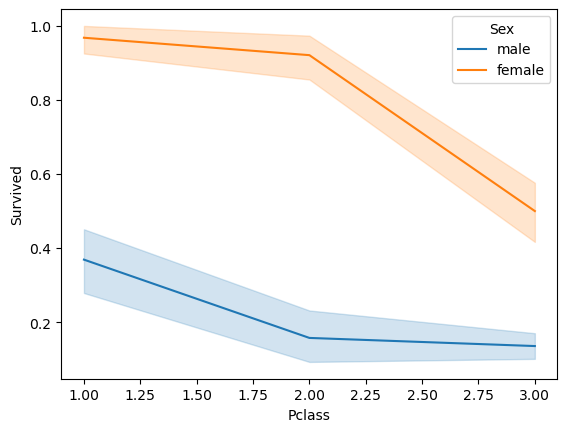

In [11]:
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.show()

Di sini kita menggunakan line plot agar lebih mudah melihat tren dari data.

Terlihat untuk penumpang kelas 1 survival rate perempuan lebih tinggi dibanding lelaki. Hal ini bisa saja terjadi karena perempuan didahulukan dalam proses evakuasi.

## Age--> Continous Feature


In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Terlihat bahwa penumpang tertua berumur 80 tahun, serta termuda masih di bawah 1 tahun. Serta rata rata penumpang berumur 29 - 30 tahun

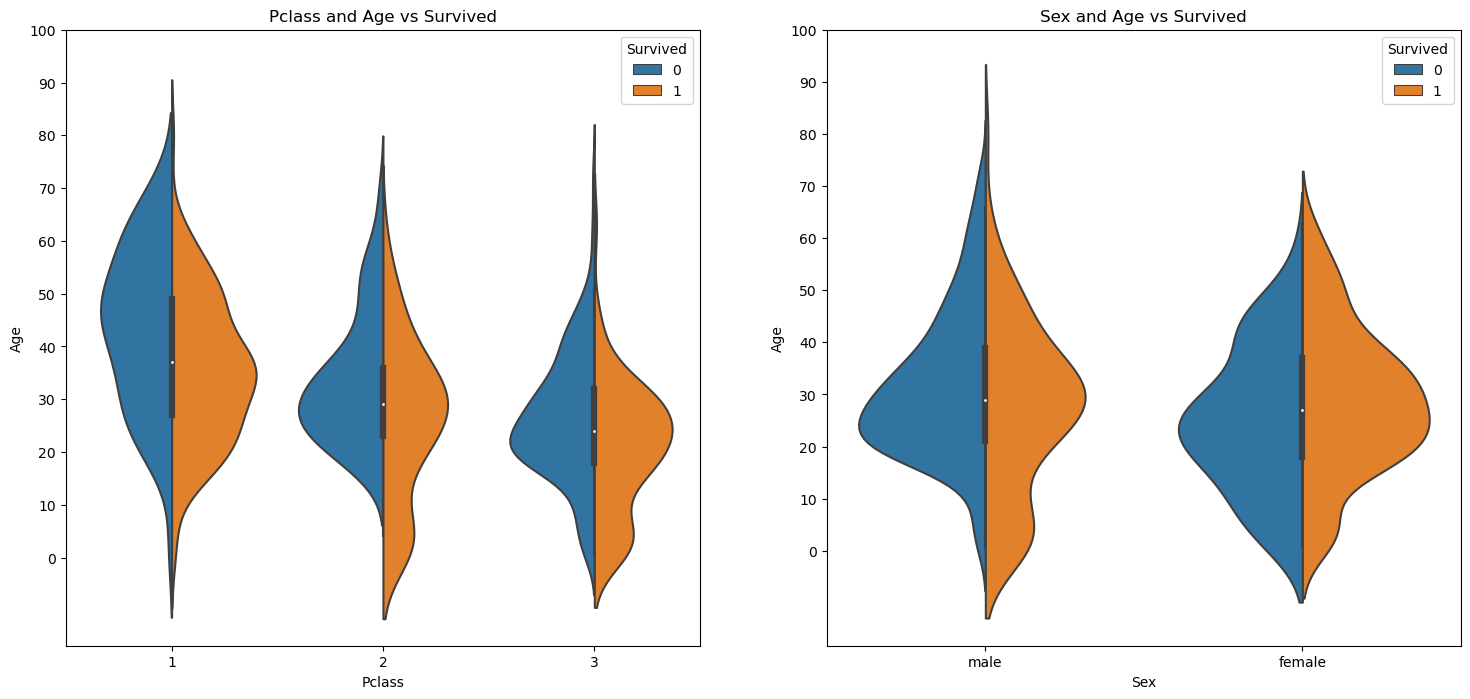

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1) Tingkat kelangsungan hidup penumpang di bawah usia 10 tahun (yaitu anak-anak) terlihat baik, apa pun kelas nya.

2) Peluang bertahan hidup bagi Penumpang berusia 20-50 tahun dari Pclass1 tinggi dan bahkan lebih baik lagi bagi Wanita.

3) Bagi laki-laki, peluang kelangsungan hidup menurun seiring bertambahnya usia.

Seperti yang telah kita lihat sebelumnya, fitur age memiliki **177** nilai null. Untuk mengganti nilai NaN ini, kita dapat menetapkan usia rata-rata kumpulan data kepada nilai tersebut.

kita dapat memeriksa fitur **Name**. Dilihat dari cirinya, kita dapat melihat bahwa nama-nama tersebut memiliki panggilan seperti Mr. atau Mrs. sehingga, kita dapat menetapkan nilai rata-rata Mr. atau Mrs. pada kelompok masing-masing.

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Terdapat beberapa Inisial yang salah eja seperti Mlle atau Mme yang merupakan singkatan dari Miss. kita akan menggantinya dengan Miss dan hal yang sama untuk nilai lainnya.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #So no null values left finally 

False

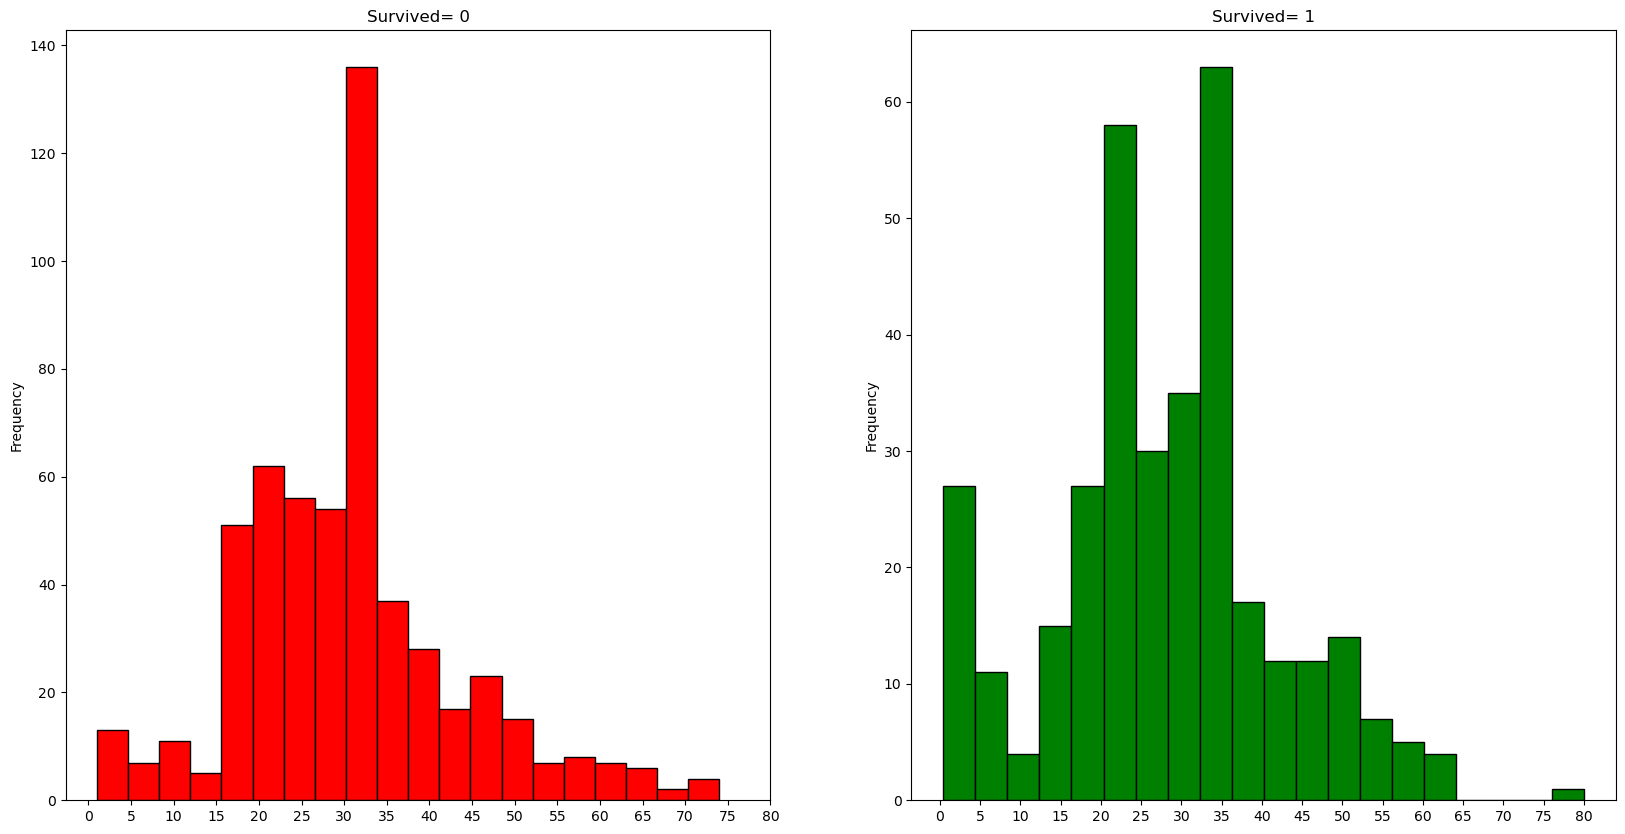

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1) Balita (usia<5) selamat dalam jumlah besar (The Women and Child First Policy).

2) Penumpang tertua berhasil diselamatkan (80 tahun).

3) Jumlah kematian terbanyak terjadi pada kelompok umur 30-40 tahun.

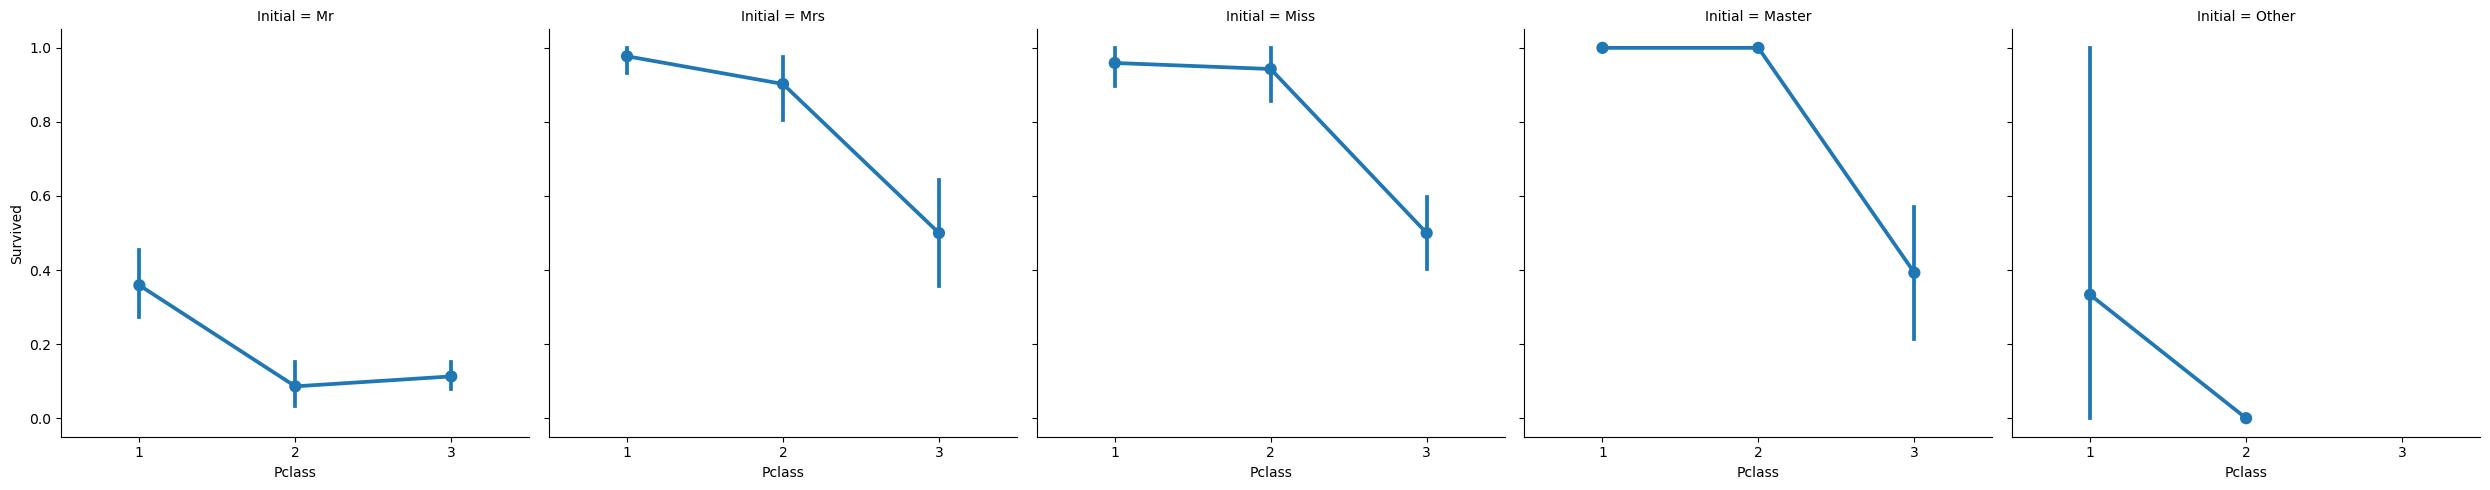

In [21]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='point', linestyles=['-'])
plt.show()

Kebijakan The Women and Child First Policy tetap berlaku tanpa memandang kelas.

## Embarked--> Categorical Value

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Peluang untuk Bertahan Hidup berdasarkan Pelabuhan keberangkatan

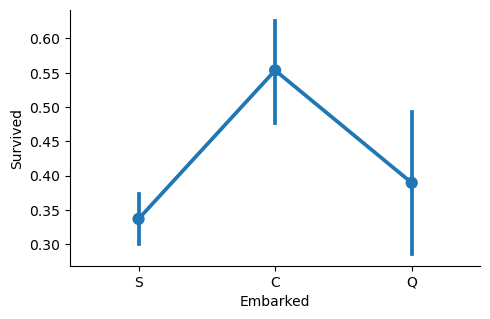

In [23]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point', linestyles=['-'])
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Peluang bertahan hidup untuk Pelabuhan C paling tinggi sekitar 0,55 sedangkan yang terendah untuk S.

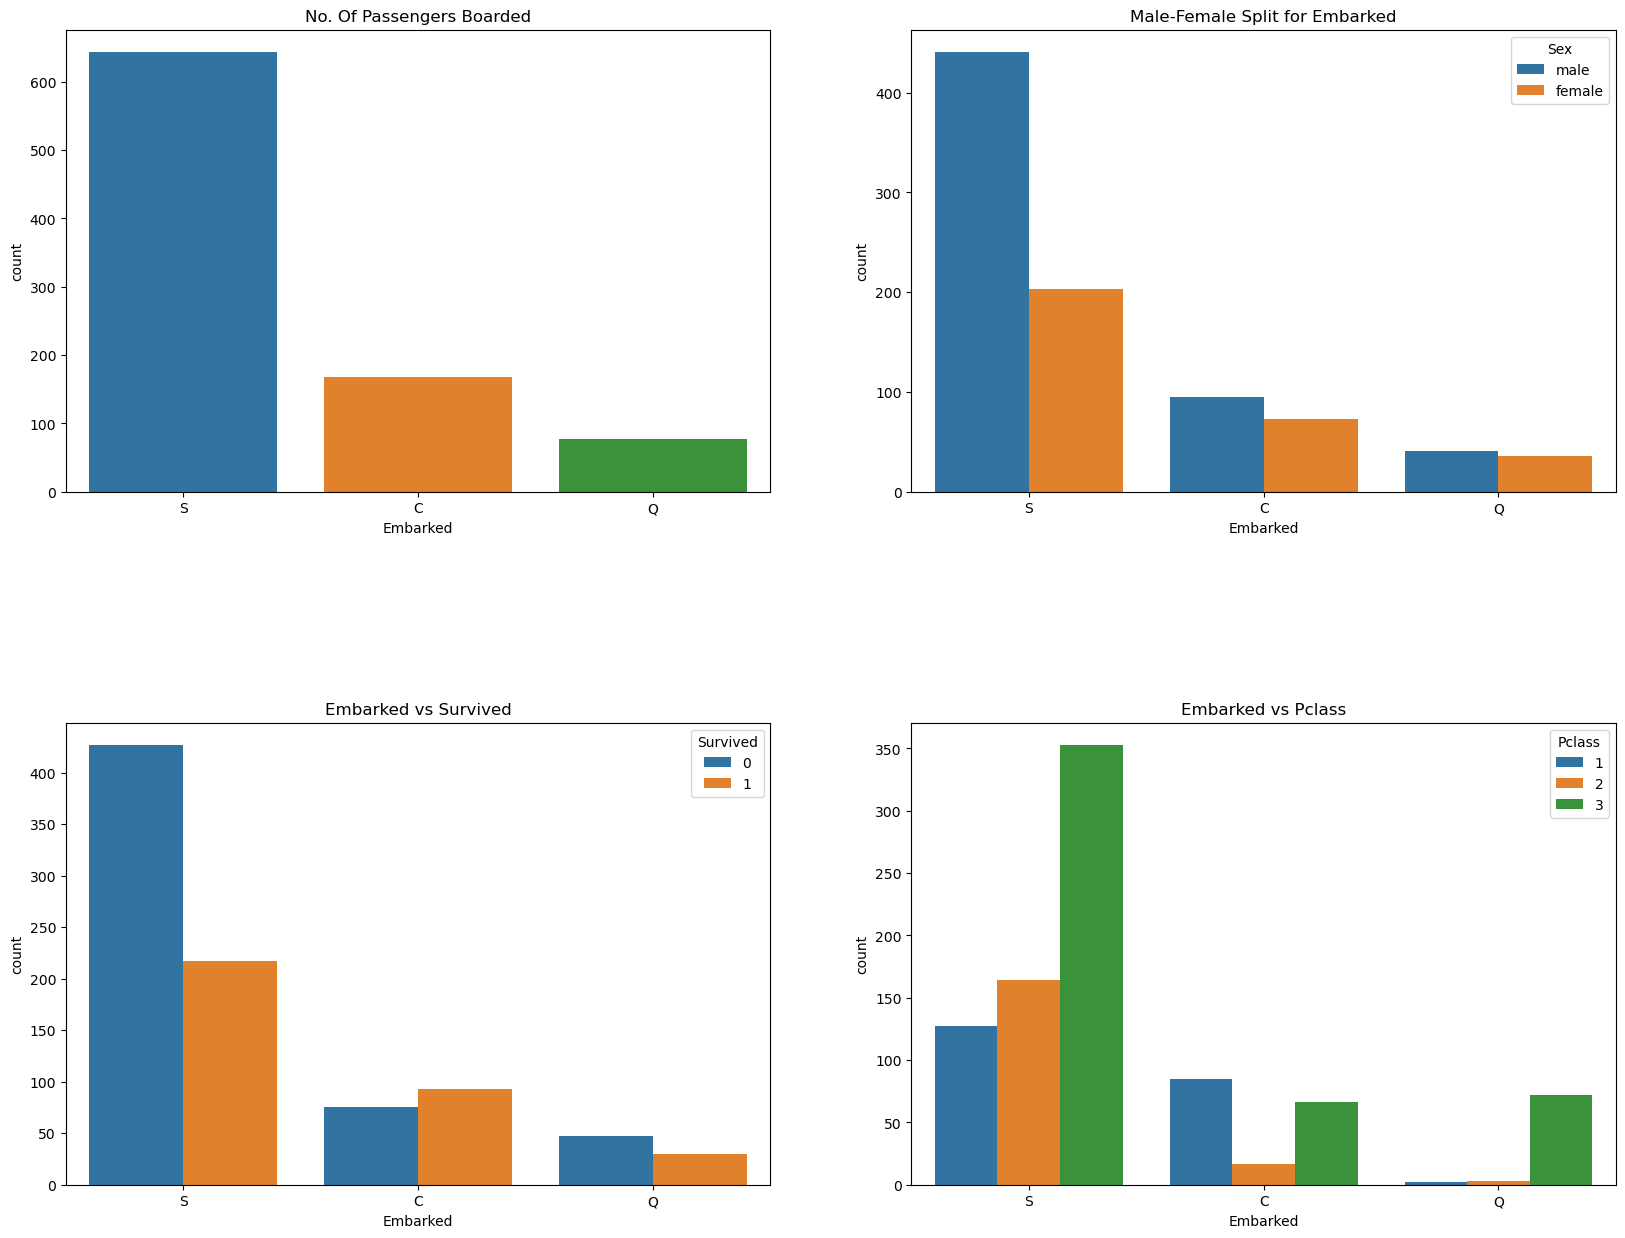

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) Kebanyakan penumpang yang berangkat dari S dari Pclass3.

2) Penumpang dari C tampaknya beruntung karena sebagian besar dari mereka selamat. Alasannya mungkin adalah penyelamatan semua Penumpang Pclass1 dan Pclass2.

3) Embark S menghadap ke pelabuhan tempat sebagian besar orang kaya berlabuh. Namun peluang untuk bertahan hidup di sini rendah, karena banyak penumpang dari Pclass3 sekitar **81%** yang tidak selamat.

4) Port Q memiliki hampir 95% penumpang berasal dari Pclass3.

### Filling Embarked NaN

Karena sebagian besar penumpang naik dari Pelabuhan S, kami mengganti NaN dengan S.

In [25]:
data['Embarked'].fillna('S',inplace=True)

In [26]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


c:\Users\agung\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


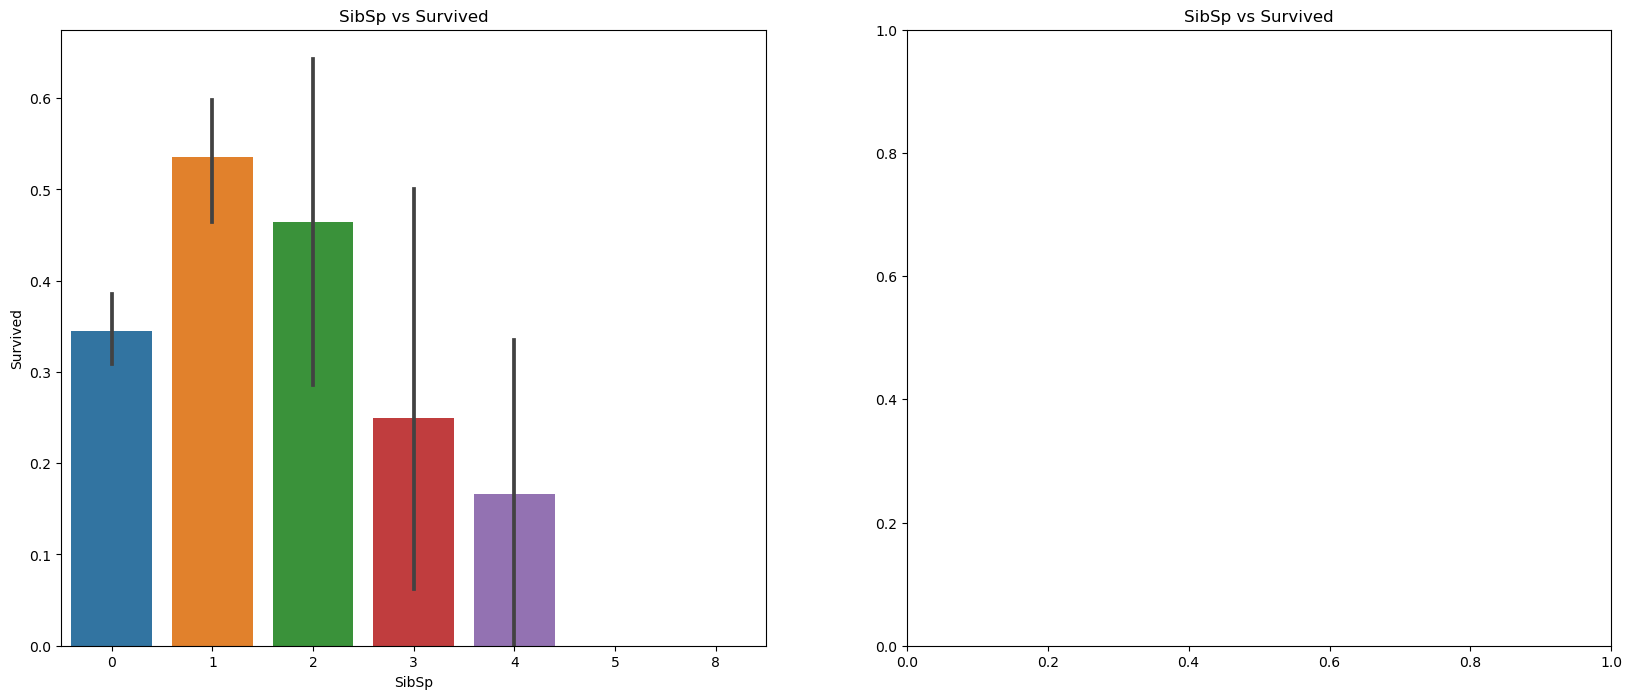

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data,ax=ax[1],kind="bar")
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

c:\Users\agung\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


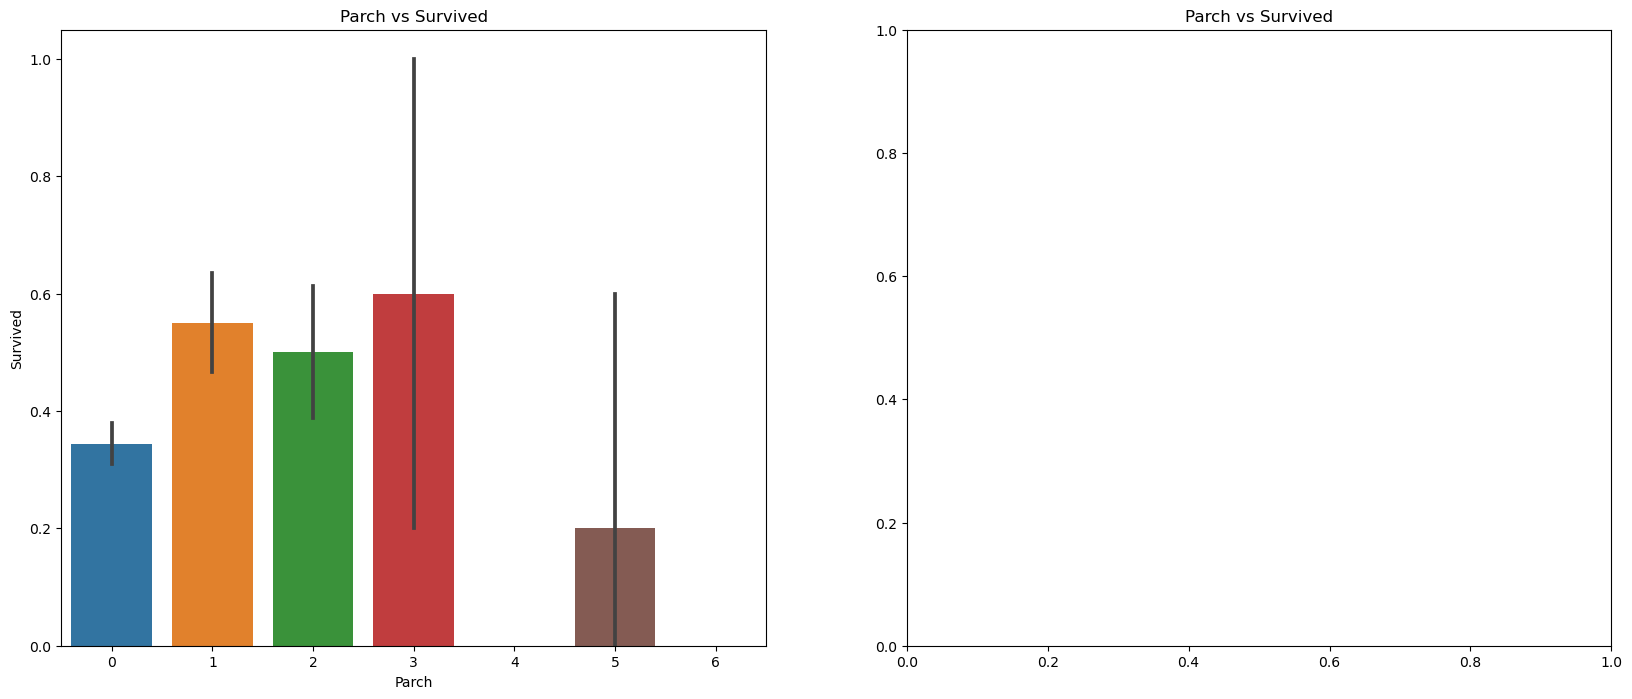

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(x='Parch',y='Survived',data=data,ax=ax[1],kind="bar")
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

## Fare--> Continous Feature

In [32]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


C:\Users\agung\AppData\Local\Temp\ipykernel_9852\2377214865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
C:\Users\agung\AppData\Local\Temp\ipykernel_9852\2377214865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==2].Fare,ax=a

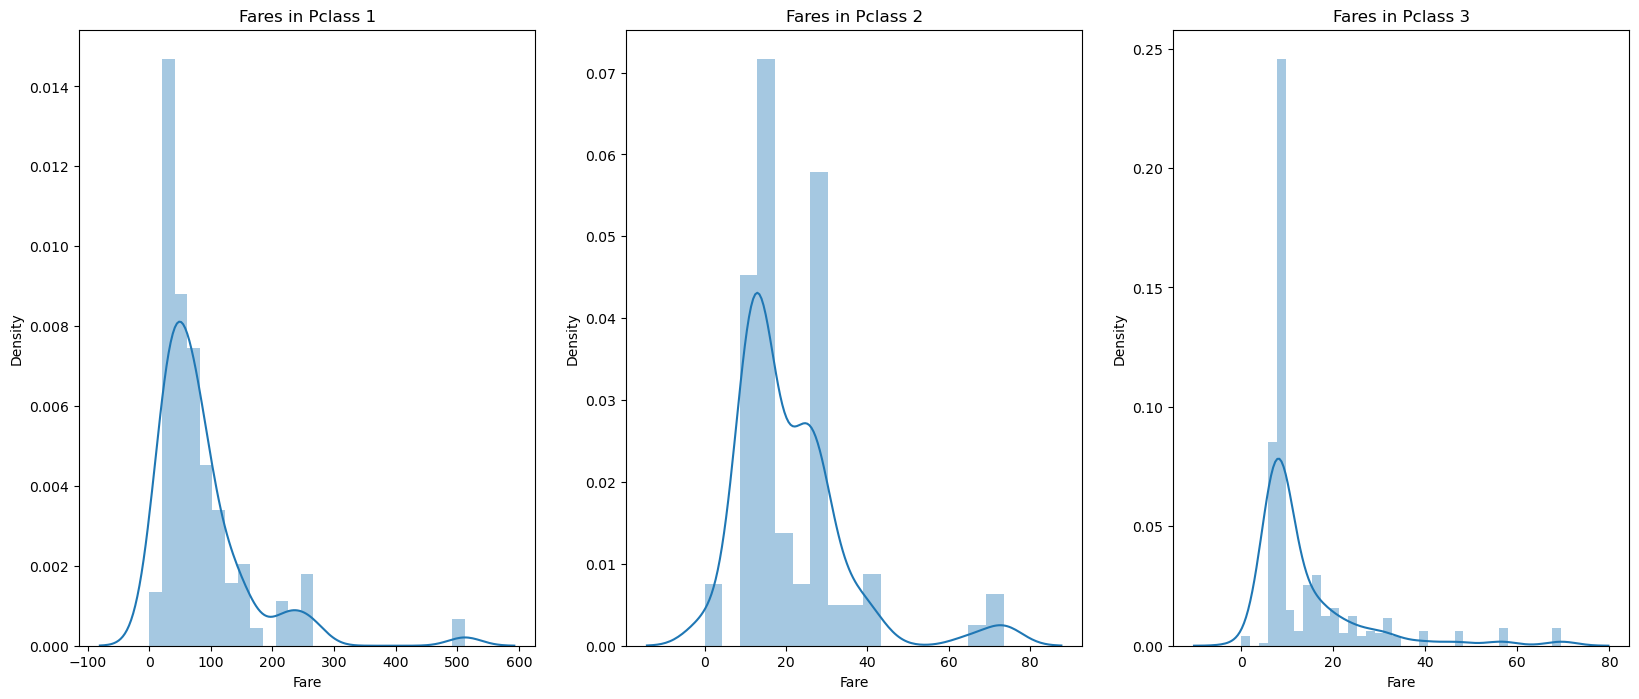

In [33]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## Correlation Between The Features

C:\Users\agung\AppData\Local\Temp\ipykernel_9852\1470036613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix


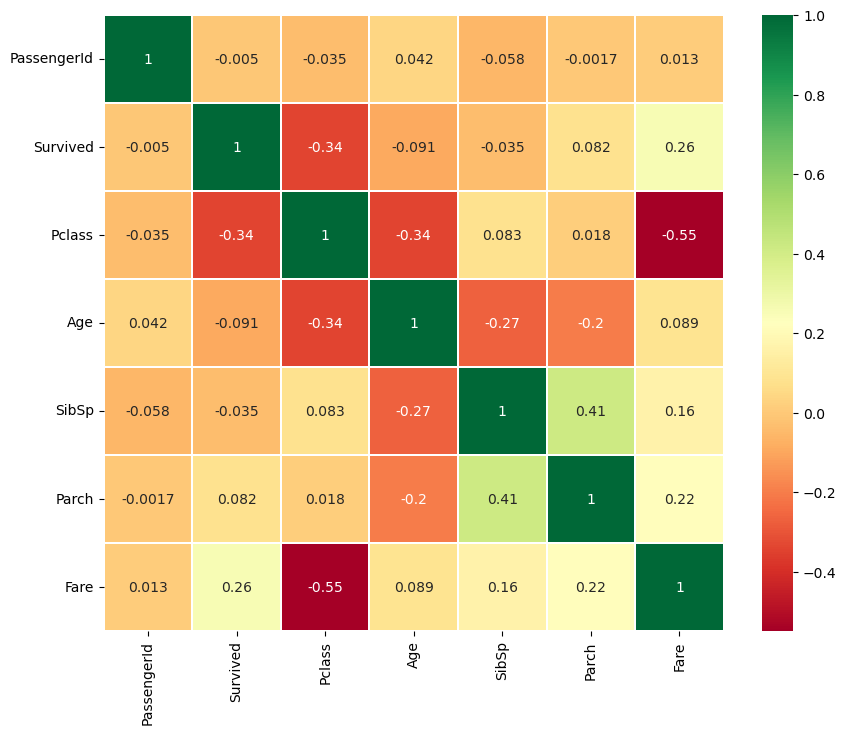

In [34]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()